# MileStone2

Make a Data Exploration notebook giving
1. some visualization of the data
2. some descriptive statistics (including biases in labels)
3. explain what you are doing in text cells.
4. Discuss missing, imbalanced, or sparse data problems.
5. Make a Baseline learning notebook carrying, some sort of linear or logistic regression (to be used as a benchmark; feel free to use sklearn).  Details left to you, but explain what you are doing in text cells in the notebook.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
original_df = pd.read_csv('https://raw.githubusercontent.com/wadefagen/datasets/master/gpa/uiuc-gpa-dataset.csv')
original_df.to_pickle("./uiuc-gpa-dataset.pkl")

In [ ]:
df = pd.read_pickle("./uiuc-gpa-dataset.pkl")
df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,0,0,0,0,0,0,0,1,0,"Shin, Jeongsu"
1,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,17,2,...,1,0,0,0,0,0,0,0,1,"Shin, Jeongsu"
2,2023,Spring,2023-sp,AAS,100,Intro Asian American Studies,DIS,0,13,2,...,2,0,0,1,0,0,0,1,0,"Lee, Sabrina Y"
3,2023,Spring,2023-sp,AAS,200,U.S. Race and Empire,LCD,6,15,5,...,0,0,0,0,0,1,0,1,0,"Sawada, Emilia"
4,2023,Spring,2023-sp,AAS,215,US Citizenship Comparatively,LCD,16,12,2,...,1,0,0,0,0,0,0,0,0,"Kwon, Soo Ah"


### Nan Values

As we can see, only sched type and primary instructor contains missing values. We can simply drop the instructor column as we are not planed to use that column. For sched type, we decide not to dropna as there is a quite large number of rows missing that data. Instead, we fillna with "Other" and perform a one hot encoding to the sched type col.

In [ ]:
df.isna().sum()

Year                      0
Term                      0
YearTerm                  0
Subject                   0
Number                    0
Course Title              0
Sched Type            10053
A+                        0
A                         0
A-                        0
B+                        0
B                         0
B-                        0
C+                        0
C                         0
C-                        0
D+                        0
D                         0
D-                        0
F                         0
W                         0
Primary Instructor      177
dtype: int64

In [ ]:
df[df.isna().any(axis=1)].head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
4266,2022,Fall,2022-fa,MATH,416,Abstract Linear Algebra,LCD,1,5,5,...,2,0,0,2,0,1,0,1,2,NaN
6104,2022,Spring,2022-sp,FIN,300,Financial Markets,LCD,4,9,9,...,4,0,1,1,1,1,0,0,0,NaN
6105,2022,Spring,2022-sp,FIN,300,Financial Markets,LCD,2,9,4,...,4,3,2,2,1,0,1,0,0,NaN
6127,2022,Spring,2022-sp,FIN,500,Introduction to Finance,LCD,2,18,14,...,0,0,0,0,0,0,0,0,1,NaN
7147,2022,Spring,2022-sp,SPAN,232,Spanish in the Community,LCD,30,14,3,...,3,2,0,0,0,1,0,2,0,NaN


In [ ]:
df['Sched Type'].unique()

array(['DIS', 'LCD', 'LEC', 'ONL', 'OLC', 'OLB', 'LBD', 'LAB', 'ST',
       'CNF', 'INT', 'Onl', 'OD', 'SEM', 'PR', 'PKG', 'Q', nan, 'Int'],
      dtype=object)

### Imbalance data

Imbalanced data might occur in a classification problem setting.This data was collected systematically without any bias or over/under-sampling of certain categories, it's more likely to be balanced. As shown, the percentage of 4.0 for each section as majority is 0.38, which is a signal for very slightly imbalance data, which can be ignored.

In [ ]:
df_A_percent = (df['A']+df['A+'])/ (df['A']+df['A+']+df['A-']+df['B-']+df['B']+df['B+']+df['C+']+df['C']+df['C-']+df['D+']+df['D']+df['D-']+df['F']+df['W'])

In [ ]:
df_A_percent

0        0.500000
1        0.708333
2        0.619048
3        0.636364
4        0.848485
           ...   
69064    0.468750
69065    0.571429
69066    0.035714
69067    0.142857
69068    0.333333
Length: 69069, dtype: float64

In [ ]:
df_A_percent[df_A_percent > .5].size / df_A_percent.size

0.3829938177764265

### sparse data

The columns of F, W and Ds has very sparse data. However, as our goal is not focus on prediction or classification with respect to the percentage of Fs etc, sparse data shall not be a problem for our objective.

### Visualization 1 & 2

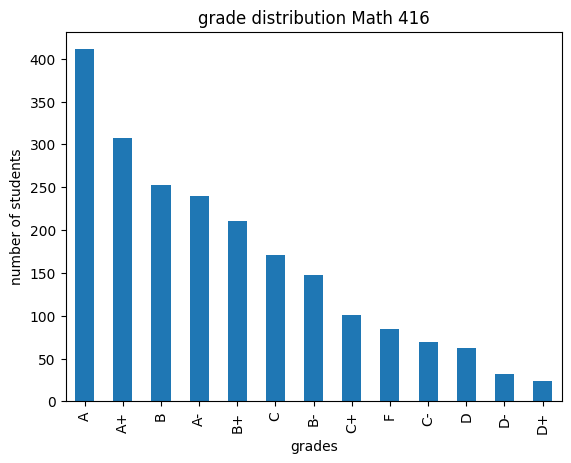

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
MATH_416 = df[df['Course Title']=='Abstract Linear Algebra']
grade_col = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
MATH_416_summary = MATH_416[grade_col].sum().sort_values(ascending=False)
MATH_416_summary.plot(kind='bar')
plt.title("grade distribution Math 416")
plt.xlabel("grades")
plt.ylabel("number of students")
plt.show()

<ipython-input-59-1ab3b9454bf3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MATH_416[grade + '_Weighted'] = MATH_416[grade] * points
<ipython-input-59-1ab3b9454bf3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MATH_416[grade + '_Weighted'] = MATH_416[grade] * points
<ipython-input-59-1ab3b9454bf3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

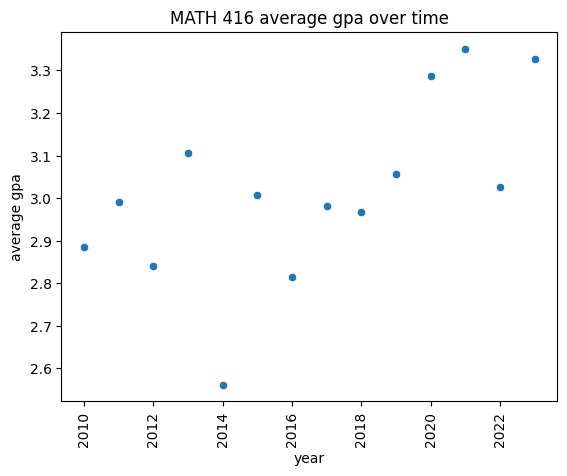

In [ ]:
grade_points = {'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0}
overall = 0
for grade, points in grade_points.items():
    MATH_416[grade + '_Weighted'] = MATH_416[grade] * points
weighted_columns = [grade + '_Weighted' for grade in grade_points]
MATH_416['Total_Weighted_Score'] = MATH_416[weighted_columns].sum(axis=1)

grade_counts = [grade for grade in grade_points]
MATH_416['Total_Count'] = MATH_416[grade_counts].sum(axis=1)

MATH_416['weighted gpa'] = MATH_416['Total_Weighted_Score'] /MATH_416['Total_Count']

AAS_ave = MATH_416.groupby('Year')['weighted gpa'].mean().reset_index()
sns.scatterplot(data=AAS_ave,x='Year',y='weighted gpa')
plt.title('MATH 416 average gpa over time')
plt.xlabel('year')
plt.ylabel('average gpa')
plt.xticks(rotation=90)
plt.show()

In [ ]:
mean_weighted_gpa = MATH_416['weighted gpa'].mean()
std_weighted_gpa = MATH_416['weighted gpa'].std()
print(mean_weighted_gpa)
print(std_weighted_gpa)

3.040750599317701
0.3389698500498656


Visualization 1 examines the number of students get different letter grades from 2010 fa to 2023 sp. The second visualization visualize the average weighted gpa of each year of AAS 100. After that, we calculate the mean weighted gpa of AAS 100 and standard division of that. This shows students will get a gpa higher than B+ in average.

### Simple Linear Regression

Our objective is to predict whether the courses is an easy A course. In other word, we want to predict how many A's and A+'s will be occured in the section.

In [ ]:
df_x = df.drop(['Primary Instructor','YearTerm','Course Title'], axis=1)
df_x.fillna("Others",inplace=True)
term_dummies = pd.get_dummies(df_x.Term)
sched_dummies = pd.get_dummies(df_x['Sched Type'])
subject_dummies = pd.get_dummies(df_x['Subject'])


grade_to_gpa = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.67,
    'B+': 3.33, 'B': 3.0, 'B-': 2.67,
    'C+': 2.33, 'C': 2.0, 'C-': 1.67,
    'D+': 1.33, 'D': 1.0, 'D-': 0.67,
    'F': 0.0
}
grade_columns = list(grade_to_gpa.keys())

df_x['Total GPA Points'] = sum(df_x[grade] * gpa for grade, gpa in grade_to_gpa.items())

df_x['Total Students'] =df_x[grade_columns].sum(axis=1)

df_x['Average GPA'] = df_x['Total GPA Points'] / df_x['Total Students']

average_gpa_per_course = df_x.groupby('Number')['Average GPA'].mean()
df_x = pd.concat([df_x, term_dummies], axis=1)
df_x = pd.concat([df_x, sched_dummies], axis=1)
df_x = pd.concat([df_x, subject_dummies], axis=1)

df_x.drop(['Sched Type','Subject','Term'], axis=1,inplace=True)
print(df_x)

       Year  Number  A+   A  A-  B+  B  B-  C+  C  ...  TE  THEA  TRST  TSM  \
0      2023     100   0  11   5   1  4   0   0  0  ...   0     0     0    0   
1      2023     100   0  17   2   1  2   1   0  0  ...   0     0     0    0   
2      2023     100   0  13   2   2  0   2   0  0  ...   0     0     0    0   
3      2023     200   6  15   5   2  3   0   0  0  ...   0     0     0    0   
4      2023     215  16  12   2   1  1   1   0  0  ...   0     0     0    0   
...     ...     ...  ..  ..  ..  .. ..  ..  .. ..  ...  ..   ...   ...  ...   
69064  2010     410   5  10   2   2  5   1   0  1  ...   0     0     0    0   
69065  2010     440   4  12   8   1  3   0   0  0  ...   0     0     0    0   
69066  2010     212   0   1   3   2  5   7   5  1  ...   0     0     0    0   
69067  2010     251   1   2   2   1  5   0   3  3  ...   0     0     0    0   
69068  2010     335   5   8   9   4  5   1   0  4  ...   0     0     0    0   

       UKR  UP  VB  VCM  VM  YDSH  
0        0   0 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.05, random_state=0)

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

As shown, the linear regression is not good at doing this and further deep learning model are needed to improve the performance.

### Visualization 3

So this visualization 3 is to examine the gpa disparity in students taking math courses in 2022. The second visualization visualize the average gpa of total year term. We calculate the mean value of math courses gpa and its stds.

<ipython-input-68-fd3d002d9120>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_2022_df['Total GPA Points'] = sum(math_2022_df[grade] * gpa for grade, gpa in grade_to_gpa.items())
<ipython-input-68-fd3d002d9120>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_2022_df['Total Students'] = math_2022_df[grade_columns].sum(axis=1)
<ipython-input-68-fd3d002d9120>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

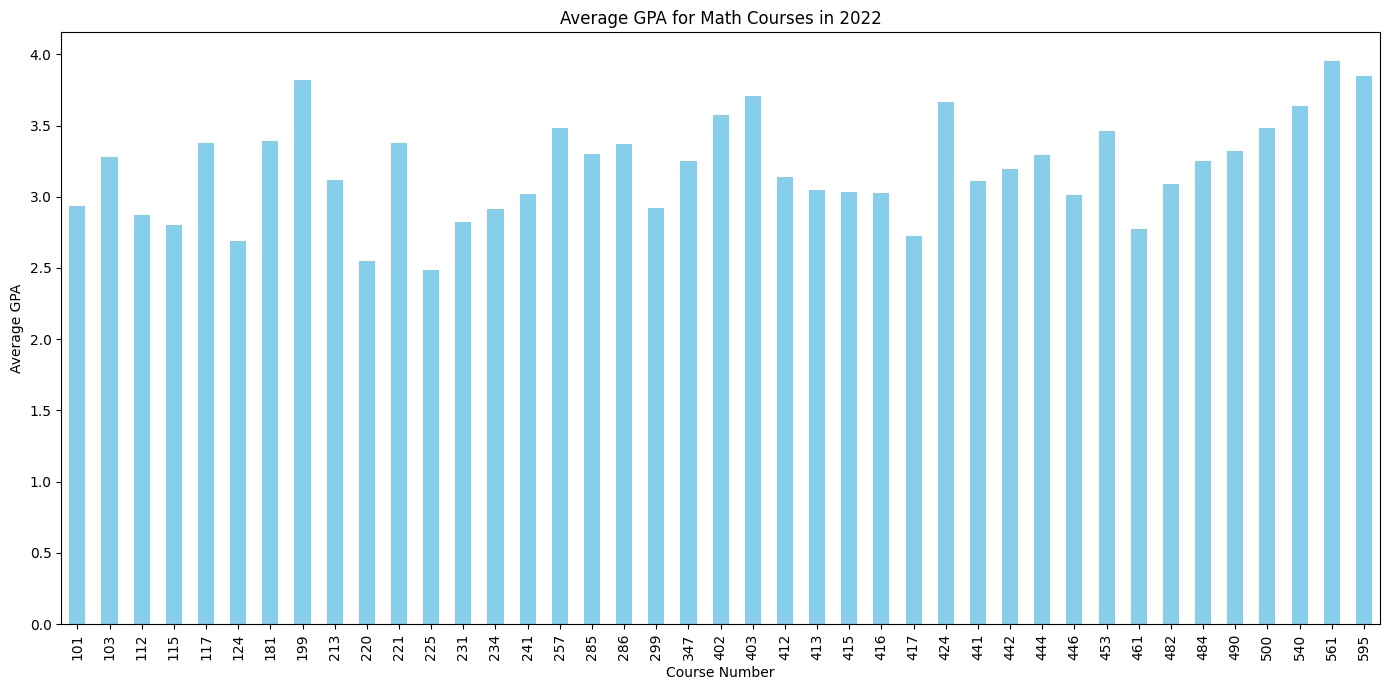

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


math_2022_df = df[(df['Subject'] == 'MATH') & (df['Year'] == 2022)]

grade_to_gpa = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.67,
    'B+': 3.33, 'B': 3.0, 'B-': 2.67,
    'C+': 2.33, 'C': 2.0, 'C-': 1.67,
    'D+': 1.33, 'D': 1.0, 'D-': 0.67,
    'F': 0.0
}


grade_columns = list(grade_to_gpa.keys())


math_2022_df['Total GPA Points'] = sum(math_2022_df[grade] * gpa for grade, gpa in grade_to_gpa.items())

math_2022_df['Total Students'] = math_2022_df[grade_columns].sum(axis=1)

math_2022_df['Average GPA'] = math_2022_df['Total GPA Points'] / math_2022_df['Total Students']

average_gpa_per_course = math_2022_df.groupby('Number')['Average GPA'].mean()

plt.figure(figsize=(14, 7))
average_gpa_per_course.plot(kind='bar', color='skyblue')

plt.title('Average GPA for Math Courses in 2022')
plt.xlabel('Course Number')
plt.ylabel('Average GPA')

plt.tight_layout()
plt.show()

<ipython-input-69-fbf5ded07420>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_df['Total GPA Points'] = sum(math_df[grade] * gpa for grade, gpa in grade_to_gpa.items())
<ipython-input-69-fbf5ded07420>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_df['Total Graded'] = math_df[list(grade_to_gpa.keys())].sum(axis=1)
<ipython-input-69-fbf5ded07420>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

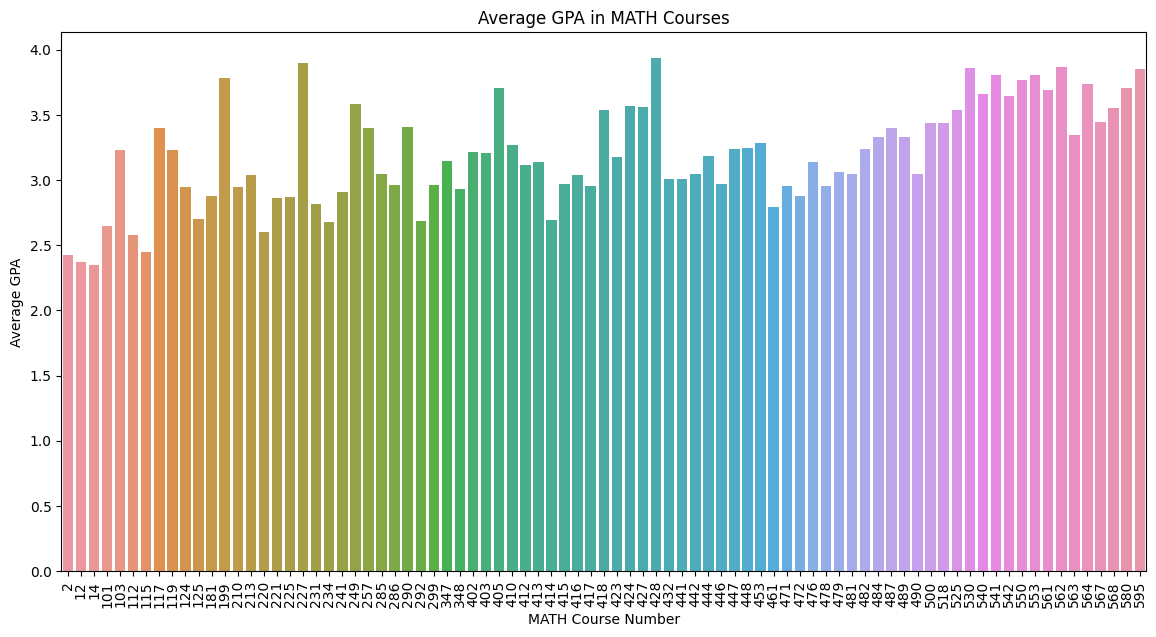

In [ ]:
math_df = df[df['Subject'] == 'MATH']

grade_to_gpa = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0
}

math_df['Total GPA Points'] = sum(math_df[grade] * gpa for grade, gpa in grade_to_gpa.items())

math_df['Total Graded'] = math_df[list(grade_to_gpa.keys())].sum(axis=1)

math_df['Average GPA'] = math_df['Total GPA Points'] / math_df['Total Graded']

average_gpa_by_course = math_df.groupby('Number')['Average GPA'].mean().reset_index()

average_gpa_by_course = average_gpa_by_course.sort_values(by='Number')

plt.figure(figsize=(14, 7))
sns.barplot(x='Number', y='Average GPA', data=average_gpa_by_course)
plt.title('Average GPA in MATH Courses')
plt.xticks(rotation=90)
plt.xlabel('MATH Course Number')
plt.ylabel('Average GPA')
plt.show()


In [ ]:
mean_gpa = average_gpa_by_course['Average GPA'].mean()
std_gpa = average_gpa_by_course['Average GPA'].std()

print(f"Mean Average GPA: {mean_gpa:.2f}")
print(f"Standard Deviation of Average GPA: {std_gpa:.2f}")

Mean Average GPA: 3.19
Standard Deviation of Average GPA: 0.39


So the mean is 3.194280 and the deviance is 0.39, which also shows that math is a hard subject to study.

We intend to predict the difficulty of UIUC math courses. Here difficulty is defined as the percentage of students who get A+ or A in the given courses: if the percentage is higher or equal to our threshold, it is easy, otherwise difficult.

In [ ]:
math_df = df[df['Subject'] == 'MATH']

math_df['Percent A/A+'] = (math_df['A'] + math_df['A+']) / math_df.iloc[:, 8:21].sum(axis=1)

threshold = 0.30

math_df['Is Easy'] = (math_df['Percent A/A+'] >= threshold).astype(int)

indices_to_drop = []
for index, row in math_df.iloc[1:].iterrows():
    year = row['Year']
    next_year = year + 1
    nnext_year = year + 2
    c_num = row['Number']
    drop = True
    for index_, row_ in math_df.iloc[1:].iterrows():
      if(row_['Number'] == c_num and row_['Year'] == next_year):
        math_df.loc[index,'Is Easy'] = row_['Is Easy']
        drop = False
      elif(row_['Number'] == c_num and row_['Year'] == nnext_year):
        math_df.loc[index,'Is Easy'] = row_['Is Easy']
        drop = False
    if(drop):
      indices_to_drop.append(index)
math_df = math_df.drop(indices_to_drop)
print(math_df)

features = math_df.drop(['Term', 'YearTerm', 'Subject', 'Course Title',
                         'Primary Instructor', 'Percent A/A+', 'Is Easy', 'Sched Type'], axis=1)

target = math_df['Is Easy']


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features, target, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train_1, y_train_1)




<ipython-input-71-e4fb420968f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_df['Percent A/A+'] = (math_df['A'] + math_df['A+']) / math_df.iloc[:, 8:21].sum(axis=1)
<ipython-input-71-e4fb420968f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_df['Is Easy'] = (math_df['Percent A/A+'] >= threshold).astype(int)


       Year    Term YearTerm Subject  Number                  Course Title  \
1545   2023  Spring  2023-sp    MATH     103          Theory of Arithmetic   
4208   2022    Fall  2022-fa    MATH     112                       Algebra   
4209   2022    Fall  2022-fa    MATH     112                       Algebra   
4210   2022    Fall  2022-fa    MATH     115      Preparation for Calculus   
4211   2022    Fall  2022-fa    MATH     115      Preparation for Calculus   
...     ...     ...      ...     ...     ...                           ...   
69009  2010  Summer  2010-su    MATH     241                  Calculus III   
69010  2010  Summer  2010-su    MATH     285  Intro Differential Equations   
69011  2010  Summer  2010-su    MATH     415        Applied Linear Algebra   
69012  2010  Summer  2010-su    MATH     415        Applied Linear Algebra   
69013  2010  Summer  2010-su    MATH     446     Applied Complex Variables   

      Sched Type  A+   A  A-  ...   C  C-  D+   D  D-   F  W  \

In [ ]:
features

,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W
1545,2023,103,8,22,6,6,3,1,3,2,0,2,0,0,1,1
4208,2022,112,12,35,20,19,21,10,8,3,8,7,2,2,10,1
4209,2022,112,16,47,32,14,25,10,9,9,4,5,5,4,11,0
4210,2022,115,13,53,4,9,28,6,6,23,2,3,7,2,5,1
4211,2022,115,18,41,11,9,35,4,3,24,0,1,17,3,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69009,2010,241,1,2,3,1,1,0,0,2,5,0,3,2,2,2
69010,2010,285,0,6,3,7,2,2,0,1,3,2,2,1,0,0
69011,2010,415,6,4,1,3,4,4,1,0,0,0,1,0,0,0
69012,2010,415,4,2,4,1,4,3,5,3,1,1,0,1,1,0


In [ ]:
#print(type(target))


In [ ]:
print(reg.score(X_train_1, y_train_1))

0.057535794819730035


In [ ]:
print(reg.score(X_test_1, y_test_1))

0.06814565199329425


As we can see, the reg is not good for us. But maybe we can still improve it by using other method.

# MileStone3

We have seen that linear regression does not produce an ideal result. Thus, we consider using more complicated neural networks as our models.

In [ ]:
#X_train_1

In [ ]:

#X_train_1.nunique()

In [ ]:
# Define mean and standard deviation for model initialization
__mean = 0.0
__std = 1.0

## Base model


In [ ]:

# Demo and training of base model with activation Sigmoid

import torch
import torch.nn as nn
import torch.optim as optim
class Net(nn.Module):
    def __init__(self, inpu_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x[...,0]
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=__mean, std=__std)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()


input_dim = X_train_1.shape[1]  #input_dim = 16
print('input_dim = ', input_dim)
model = Net(input_dim)


loss = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

lossvalue_list = []

X_train_1_tensor = torch.FloatTensor(X_train_1.values)
y_train_1_tensor = torch.FloatTensor(y_train_1.values)  #sample labels for training

num_epochs = 1000


for epoch in range(num_epochs):
  # Forward pass
  output = model(X_train_1_tensor)
  lossvalue = loss(output, y_train_1_tensor)
  lossvalue_list.append(lossvalue.item())

  # Backward pass and optimization
  optimizer.zero_grad()

  lossvalue.backward()

  optimizer.step()


X_test_1_tensor = torch.FloatTensor(X_test_1.values)
y_test_1_tensor = torch.FloatTensor(y_test_1.values)  #sample labels for testing

print('train loss =', loss(model(X_train_1_tensor), y_train_1_tensor).item())

input_dim =  16
train loss = 0.08516829460859299


In [ ]:
loss_list_out = []

In [ ]:
#X_train_1

In [ ]:
#y_test_1

In [ ]:
#y_pred = model(X_train_1_tensor).detach().numpy()
#y_pred

In [ ]:
# Algorithm for calculating accuracy of models

def __accuracy(model: torch.nn.Module, X: torch.Tensor, y_test):
  y_pred = model(X)
  y_pred = y_pred.detach().numpy()
  y_pred = (y_pred > 0.5).astype(int)
  y_test = y_test.values

  sum = 0
  #len = 1931
  len = 509    #size of test/train dataset
  for i in range(len):
    if y_pred[i] == y_test[i]: sum = sum + 1
  return sum/len

In [ ]:
__accuracy(model, X_test_1_tensor, y_test_1)

0.9135559921414538

input_dim =  16


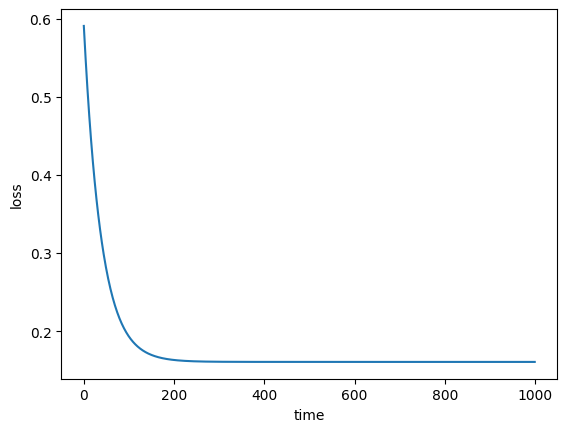

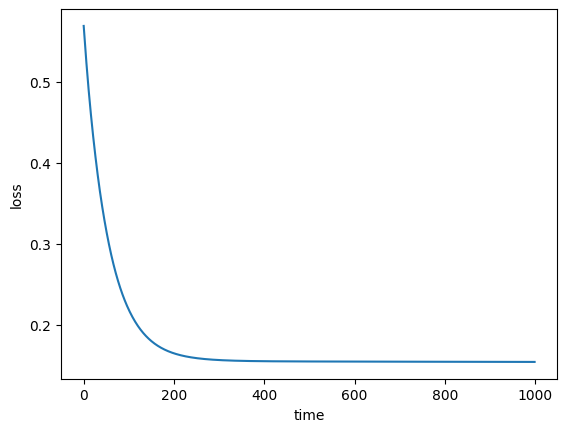

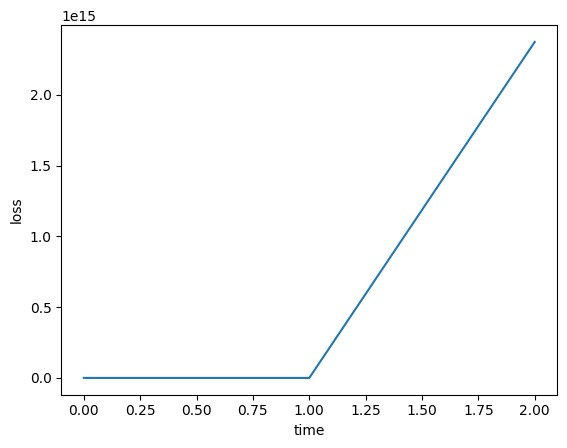

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
loss_sgd_sig = []
loss_sgd_tanh = []
loss_sgd_relu = []
class Net_sig(nn.Module):
    def __init__(self, input_dim):
        super(Net_sig, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=__mean, std=__std)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()


class Net_tanh(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_tanh, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

class Net_relu(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_relu, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=1.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

input_dim = X_train_1.shape[1]  #input_dim = 1
print('input_dim = ', input_dim)
model_1 = Net_sig(input_dim)
model_2 = Net_tanh(input_dim)
model_3 = Net_relu(input_dim)

loss = nn.MSELoss()
learning_rate = 0.0001
optimizer_1 = optim.SGD(model_1.parameters(), lr=learning_rate)

lossvalue_list = []


X_train_1_tensor = torch.FloatTensor(X_train_1.values)  #sample features for training
y_train_1_tensor = torch.FloatTensor(y_train_1.values)  #sample labels for training

num_epochs = 1000


for epoch in range(num_epochs):
  # Forward pass
  output = model_1(X_train_1_tensor)
  lossvalue_1 = loss(output, y_train_1_tensor)
  loss_sgd_sig.append(lossvalue_1.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_1.item())
  lossvalue_list.append(lossvalue_1.item())


  # Backward pass and optimization
  optimizer_1.zero_grad()

  lossvalue_1.backward()

  optimizer_1.step()

optimizer_2 = optim.SGD(model_2.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_2(X_train_1_tensor)
  lossvalue_2 = loss(output, y_train_1_tensor)
  loss_sgd_tanh.append(lossvalue_2.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_2.item())
  lossvalue_list.append(lossvalue_2.item())


  # Backward pass and optimization
  optimizer_2.zero_grad()

  lossvalue_2.backward()

  optimizer_2.step()
optimizer_3 = optim.SGD(model_3.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_3(X_train_1_tensor)
  lossvalue_3 = loss(output, y_train_1_tensor)
  loss_sgd_relu.append(lossvalue_3.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_3.item())
  lossvalue_list.append(lossvalue_3.item())


  # Backward pass and optimization
  optimizer_3.zero_grad()

  lossvalue_3.backward()

  optimizer_3.step()
plt.plot(loss_sgd_sig,label = "sgd sig")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_sgd_tanh,label = "sgd tanh")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_sgd_relu,label = "sgd relu")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()

In [ ]:
print(__accuracy(model_1, X_test_1_tensor, y_test_1))
print(__accuracy(model_2, X_test_1_tensor, y_test_1))
print(__accuracy(model_3, X_test_1_tensor, y_test_1))

0.8113948919449901
0.8113948919449901
0.18860510805500982




```
# This is formatted as code
```

## Comparison of Optimization methods and hyper parameter training (activation functions)

1.   SGD
2.   Adam
3.   Adadelta
4.   Adagrad
5.   ASGD




input_dim =  16


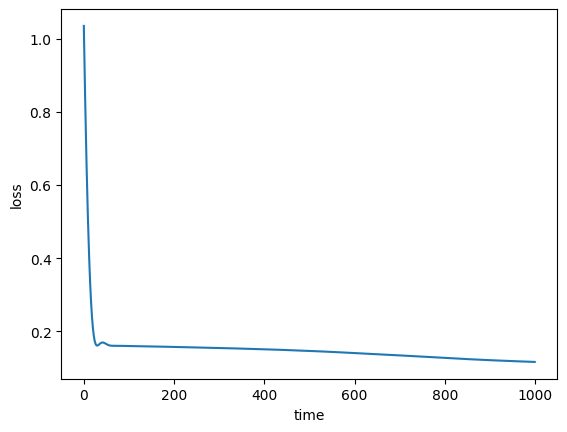

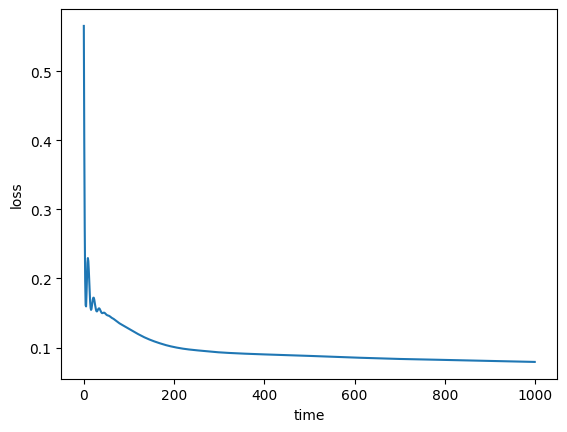

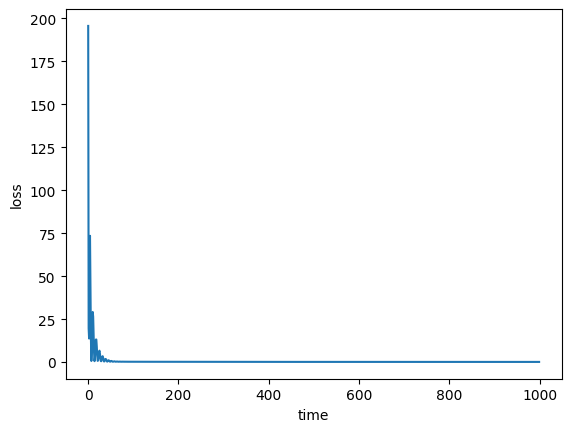

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
loss_adam_sig = []
loss_adam_tanh = []
loss_adam_relu = []
class Net_sig(nn.Module):
    def __init__(self, input_dim):
        super(Net_sig, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=__mean, std=__std)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()


class Net_tanh(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_tanh, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

class Net_relu(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_relu, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=1.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

input_dim = X_train_1.shape[1]
print('input_dim = ', input_dim)
model_1 = Net_sig(input_dim)
model_2 = Net_tanh(input_dim)
model_3 = Net_relu(input_dim)

loss = nn.MSELoss()
learning_rate = 0.0001
optimizer_1 = optim.Adam(model_1.parameters(), lr=learning_rate)

lossvalue_list = []


X_train_1_tensor = torch.FloatTensor(X_train_1.values)  #sample features for training
y_train_1_tensor = torch.FloatTensor(y_train_1.values)  #sample labels for training



for epoch in range(num_epochs):
  # Forward pass
  output = model_1(X_train_1_tensor)
  lossvalue_1 = loss(output, y_train_1_tensor)
  loss_adam_sig.append(lossvalue_1.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_1.item())
  lossvalue_list.append(lossvalue_1.item())


  # Backward pass and optimization
  optimizer_1.zero_grad()

  lossvalue_1.backward()

  optimizer_1.step()

optimizer_2 = optim.Adam(model_2.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_2(X_train_1_tensor)
  lossvalue_2 = loss(output, y_train_1_tensor)
  loss_adam_tanh.append(lossvalue_2.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_2.item())
  lossvalue_list.append(lossvalue_2.item())


  # Backward pass and optimization
  optimizer_2.zero_grad()

  lossvalue_2.backward()

  optimizer_2.step()
optimizer_3 = optim.Adam(model_3.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_3(X_train_1_tensor)
  lossvalue_3 = loss(output, y_train_1_tensor)
  loss_adam_relu.append(lossvalue_3.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_3.item())
  lossvalue_list.append(lossvalue_3.item())


  # Backward pass and optimization
  optimizer_3.zero_grad()

  lossvalue_3.backward()

  optimizer_3.step()
plt.plot(loss_adam_sig,label = "adam sig")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_adam_tanh,label = "adam tanh")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_adam_relu,label = "adam relu")
plt.xlabel('time')
plt.ylabel('loss')
plt.show()



In [ ]:
print(__accuracy(model_1, X_test_1_tensor, y_test_1))
print(__accuracy(model_2, X_test_1_tensor, y_test_1))
print(__accuracy(model_3, X_test_1_tensor, y_test_1))

0.8546168958742633
0.9174852652259332
0.8722986247544204


input_dim =  16


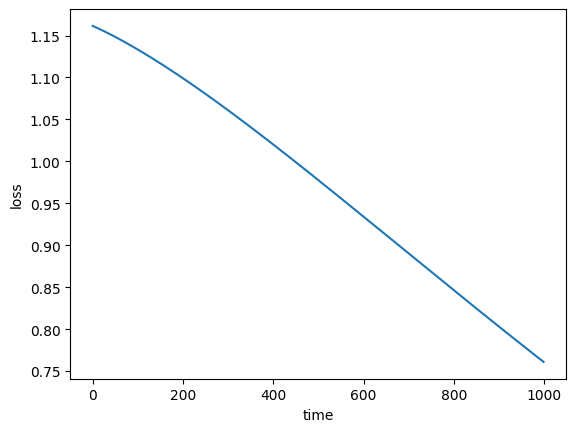

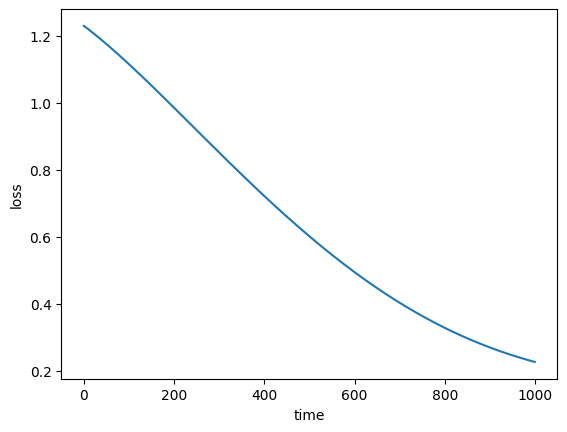

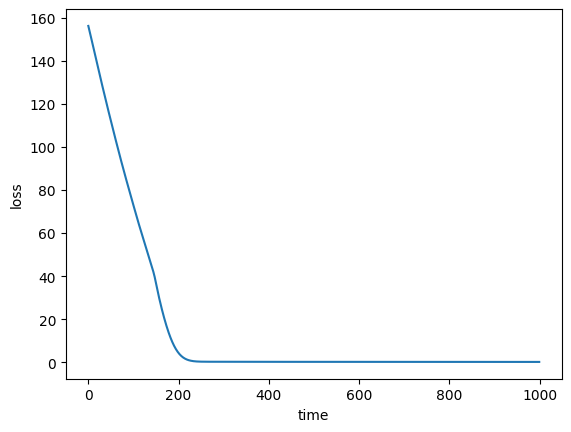

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
loss_adadelta_sig = []
loss_adadelta_tanh = []
loss_adadelta_relu = []
class Net_sig(nn.Module):
    def __init__(self, input_dim):
        super(Net_sig, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=__mean, std=__std)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()


class Net_tanh(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_tanh, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

class Net_relu(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_relu, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=1.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()
input_dim = X_train_1.shape[1]
print('input_dim = ', input_dim)
model_1 = Net_sig(input_dim)
model_2 = Net_tanh(input_dim)
model_3 = Net_relu(input_dim)

loss = nn.MSELoss()
learning_rate = 0.0001
optimizer_1 = optim.Adadelta(model_1.parameters(), lr=learning_rate)

lossvalue_list = []


X_train_1_tensor = torch.FloatTensor(X_train_1.values)  #sample features for training
y_train_1_tensor = torch.FloatTensor(y_train_1.values)  #sample labels for training



for epoch in range(num_epochs):
  # Forward pass
  output = model_1(X_train_1_tensor)
  lossvalue_1 = loss(output, y_train_1_tensor)
  loss_adadelta_sig.append(lossvalue_1.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_1.item())
  lossvalue_list.append(lossvalue_1.item())


  # Backward pass and optimization
  optimizer_1.zero_grad()

  lossvalue_1.backward()

  optimizer_1.step()

optimizer_2 = optim.Adadelta(model_2.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_2(X_train_1_tensor)
  lossvalue_2 = loss(output, y_train_1_tensor)
  loss_adadelta_tanh.append(lossvalue_2.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_2.item())
  lossvalue_list.append(lossvalue_2.item())


  # Backward pass and optimization
  optimizer_2.zero_grad()

  lossvalue_2.backward()

  optimizer_2.step()
optimizer_3 = optim.Adadelta(model_3.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_3(X_train_1_tensor)
  lossvalue_3 = loss(output, y_train_1_tensor)
  loss_adadelta_relu.append(lossvalue_3.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_3.item())
  lossvalue_list.append(lossvalue_3.item())


  # Backward pass and optimization
  optimizer_3.zero_grad()

  lossvalue_3.backward()

  optimizer_3.step()
plt.plot(loss_adadelta_sig)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_adadelta_tanh)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_adadelta_relu)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()

In [ ]:
print(__accuracy(model_1, X_test_1_tensor, y_test_1))
print(__accuracy(model_2, X_test_1_tensor, y_test_1))
print(__accuracy(model_3, X_test_1_tensor, y_test_1))

0.18860510805500982
0.8113948919449901
0.8133595284872298


input_dim =  16


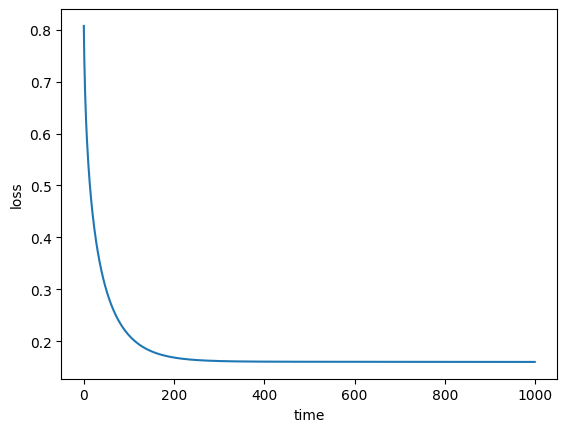

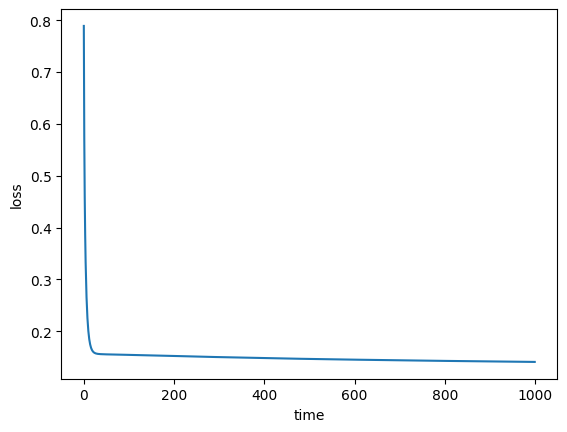

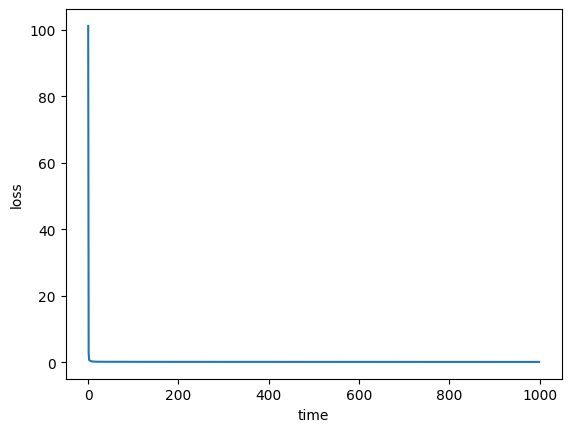

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
loss_adagrad_sig = []
loss_adagrad_tanh = []
loss_adagrad_relu = []
class Net_sig(nn.Module):
    def __init__(self, input_dim):
        super(Net_sig, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=__mean, std=__std)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()


class Net_tanh(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_tanh, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

class Net_relu(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_relu, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=1.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

input_dim = X_train_1.shape[1]  #input_dim = 1
print('input_dim = ', input_dim)
model_1 = Net_sig(input_dim)
model_2 = Net_tanh(input_dim)
model_3 = Net_relu(input_dim)

loss = nn.MSELoss()
learning_rate = 0.0001
optimizer_1 = optim.Adagrad(model_1.parameters(), lr=learning_rate)

lossvalue_list = []


X_train_1_tensor = torch.FloatTensor(X_train_1.values)  #sample features for training
y_train_1_tensor = torch.FloatTensor(y_train_1.values)  #sample labels for training



for epoch in range(num_epochs):
  # Forward pass
  output = model_1(X_train_1_tensor)
  lossvalue_1 = loss(output, y_train_1_tensor)
  loss_adagrad_sig.append(lossvalue_1.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_1.item())
  lossvalue_list.append(lossvalue_1.item())


  # Backward pass and optimization
  optimizer_1.zero_grad()

  lossvalue_1.backward()

  optimizer_1.step()

optimizer_2 = optim.Adagrad(model_2.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_2(X_train_1_tensor)
  lossvalue_2 = loss(output, y_train_1_tensor)
  loss_adagrad_tanh.append(lossvalue_2.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_2.item())
  lossvalue_list.append(lossvalue_2.item())


  # Backward pass and optimization
  optimizer_2.zero_grad()

  lossvalue_2.backward()

  optimizer_2.step()
optimizer_3 = optim.Adagrad(model_3.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_3(X_train_1_tensor)
  lossvalue_3 = loss(output, y_train_1_tensor)
  loss_adagrad_relu.append(lossvalue_3.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_3.item())
  lossvalue_list.append(lossvalue_3.item())


  # Backward pass and optimization
  optimizer_3.zero_grad()

  lossvalue_3.backward()

  optimizer_3.step()
plt.plot(loss_adagrad_sig)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_adagrad_tanh)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_adagrad_relu)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()

In [ ]:
print(__accuracy(model_1, X_test_1_tensor, y_test_1))
print(__accuracy(model_2, X_test_1_tensor, y_test_1))
print(__accuracy(model_3, X_test_1_tensor, y_test_1))

0.8113948919449901
0.8113948919449901
0.8388998035363457


input_dim =  16


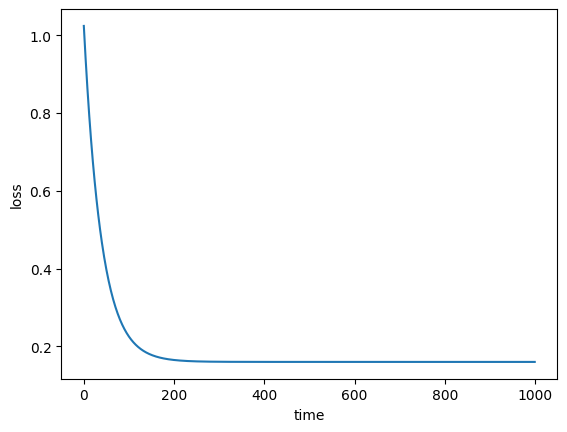

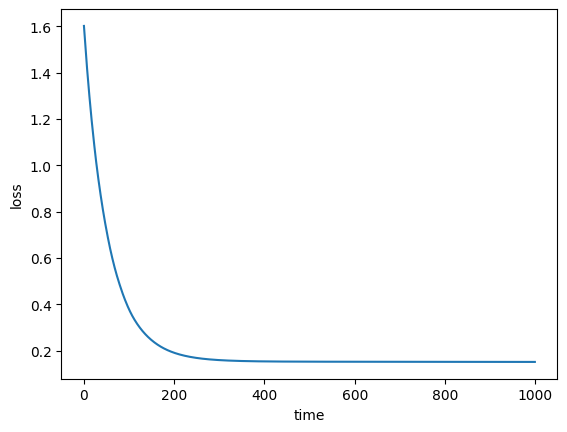

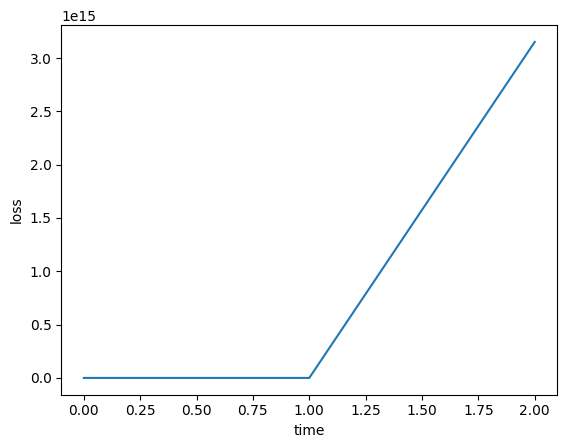

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
loss_asgd_sig = []
loss_asgd_tanh = []
loss_asgd_relu = []
class Net_sig(nn.Module):
    def __init__(self, input_dim):
        super(Net_sig, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=__mean, std=__std)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()


class Net_tanh(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_tanh, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

class Net_relu(nn.Module):
    def __init__(self, inpu_dim):
        super(Net_relu, self).__init__()
        self.fc1 = nn.Linear(input_dim, 240)
        self.fc2 = nn.Linear(240, 240)
        self.fc3 = nn.Linear(240, 240)
        self.fc4 = nn.Linear(240, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x[...,0]

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=1.0, std=1.0)   #initialized with normal distribution with mean = "mean" and std deviation = "std"
            if module.bias is not None:
                module.bias.data.zero_()

input_dim = X_train_1.shape[1]  #input_dim = 1
print('input_dim = ', input_dim)
model_1 = Net_sig(input_dim)
model_2 = Net_tanh(input_dim)
model_3 = Net_relu(input_dim)

loss = nn.MSELoss()
learning_rate = 0.0001
optimizer_1 = optim.ASGD(model_1.parameters(), lr=learning_rate)

lossvalue_list = []


X_train_1_tensor = torch.FloatTensor(X_train_1.values)  #sample features for training
y_train_1_tensor = torch.FloatTensor(y_train_1.values)  #sample labels for training




for epoch in range(num_epochs):
  # Forward pass
  output = model_1(X_train_1_tensor)
  lossvalue_1 = loss(output, y_train_1_tensor)
  loss_asgd_sig.append(lossvalue_1.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_1.item())
  lossvalue_list.append(lossvalue_1.item())


  # Backward pass and optimization
  optimizer_1.zero_grad()

  lossvalue_1.backward()

  optimizer_1.step()

optimizer_2 = optim.ASGD(model_2.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_2(X_train_1_tensor)
  lossvalue_2 = loss(output, y_train_1_tensor)
  loss_asgd_tanh.append(lossvalue_2.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_2.item())
  lossvalue_list.append(lossvalue_2.item())


  # Backward pass and optimization
  optimizer_2.zero_grad()

  lossvalue_2.backward()

  optimizer_2.step()
optimizer_3 = optim.ASGD(model_3.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  # Forward pass
  output = model_3(X_train_1_tensor)
  lossvalue_3 = loss(output, y_train_1_tensor)
  loss_asgd_relu.append(lossvalue_3.item())
  if(epoch == num_epochs - 1 ):
    loss_list_out.append(lossvalue_3.item())
  lossvalue_list.append(lossvalue_3.item())


  # Backward pass and optimization
  optimizer_3.zero_grad()

  lossvalue_3.backward()

  optimizer_3.step()
plt.plot(loss_asgd_sig)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_asgd_tanh)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()
plt.plot(loss_asgd_relu)
plt.xlabel('time')
plt.ylabel('loss')
plt.show()


In [ ]:
print(__accuracy(model_1, X_test_1_tensor, y_test_1))
print(__accuracy(model_2, X_test_1_tensor, y_test_1))
print(__accuracy(model_3, X_test_1_tensor, y_test_1))

0.8113948919449901
0.8113948919449901
0.18860510805500982


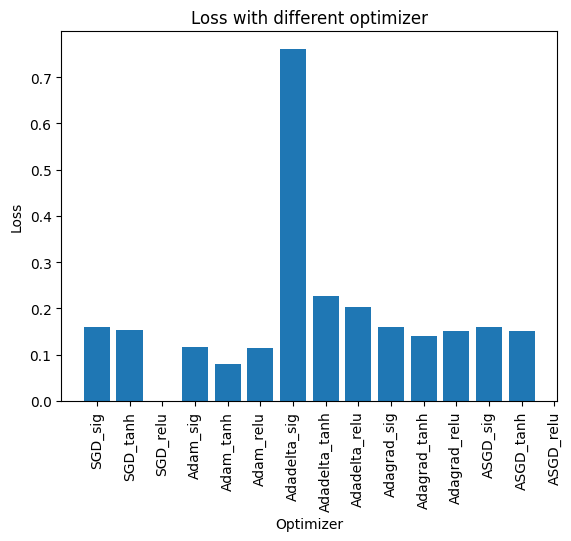

In [ ]:
ui = ['SGD_sig','SGD_tanh','SGD_relu','Adam_sig','Adam_tanh','Adam_relu','Adadelta_sig','Adadelta_tanh','Adadelta_relu','Adagrad_sig','Adagrad_tanh','Adagrad_relu','ASGD_sig','ASGD_tanh','ASGD_relu']
plt.bar(ui, loss_list_out)
plt.title('Loss with different optimizer')
plt.xticks(rotation=90)
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.show()

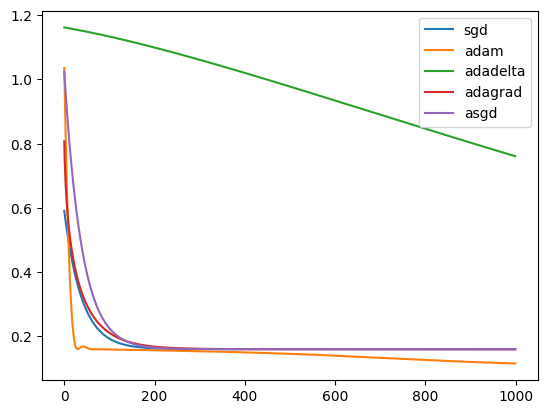

In [ ]:
# For Sigmoid Function
plt.plot(loss_sgd_sig,label='sgd')
plt.plot(loss_adam_sig,label='adam')
plt.plot(loss_adadelta_sig,label='adadelta')
plt.plot(loss_adagrad_sig,label='adagrad')
plt.plot(loss_asgd_sig,label='asgd')
plt.legend()
plt.show()

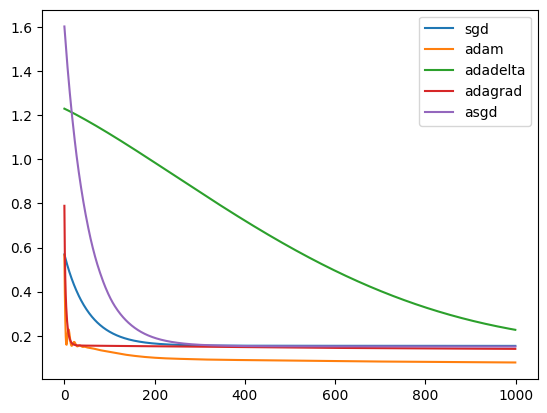

In [ ]:
# For tanh Function
plt.plot(loss_sgd_tanh,label='sgd')
plt.plot(loss_adam_tanh,label='adam')
plt.plot(loss_adadelta_tanh,label='adadelta')
plt.plot(loss_adagrad_tanh,label='adagrad')
plt.plot(loss_asgd_tanh,label='asgd')
plt.legend()
plt.show()

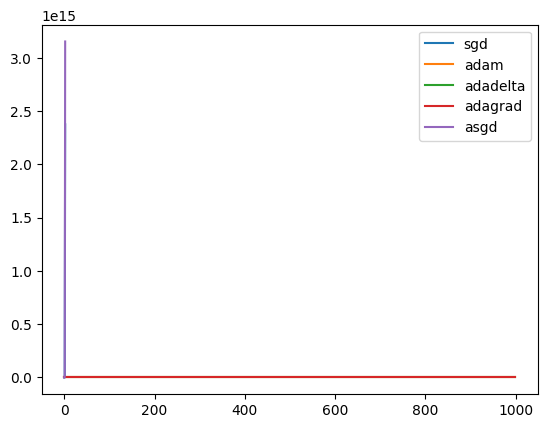

In [ ]:
# For relu Function
plt.plot(loss_sgd_relu,label='sgd')
plt.plot(loss_adam_relu,label='adam')
plt.plot(loss_adadelta_relu,label='adadelta')
plt.plot(loss_adagrad_relu,label='adagrad')
plt.plot(loss_asgd_relu,label='asgd')
plt.legend()
plt.show()

Based on the performance of optimizer, adam and adagrad have better performance than the other algorithms. However, the decrease rate of adadelta is small. It has low performance compare to other method. Adagrad have a comparatively low declay rate so we don't choose it as optimizer.

The totoal best is our model with Sigmoid activation and trained by Aadam algorithm.

## Mini-Batch



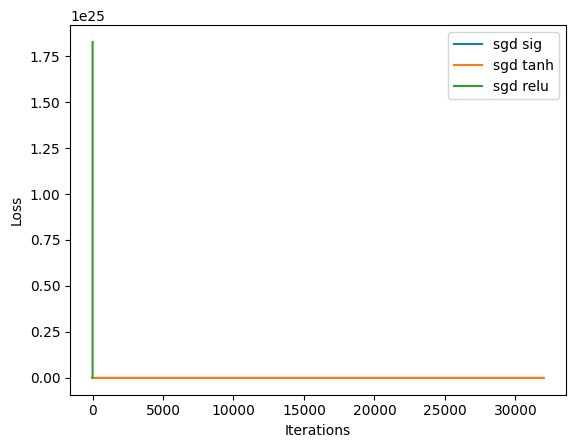

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

X_train_1_tensor = torch.FloatTensor(X_train_1.values)
y_train_1_tensor = torch.FloatTensor(y_train_1.values)

batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_1_tensor, y_train_1_tensor),
                          batch_size=batch_size, shuffle=True)


input_dim = X_train_1.shape[1]
model_1 = Net_sig(input_dim)
model_2 = Net_tanh(input_dim)
model_3 = Net_relu(input_dim)

loss = nn.MSELoss()
learning_rate = 0.0001
optimizer_1 = optim.SGD(model_1.parameters(), lr=learning_rate)
optimizer_2 = optim.SGD(model_2.parameters(), lr=learning_rate)
optimizer_3 = optim.SGD(model_3.parameters(), lr=learning_rate)

def train_model(model, optimizer, num_epochs=1000):
    model_loss = []
    for epoch in range(num_epochs):
        for data, target in train_loader:
            output = model(data)
            loss_value = loss(output, target)

            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()

            model_loss.append(loss_value.item())
    return model_loss

loss_sgd_sig = train_model(model_1, optimizer_1)
loss_sgd_tanh = train_model(model_2, optimizer_2)
loss_sgd_relu = train_model(model_3, optimizer_3)

plt.plot(loss_sgd_sig, label="sgd sig")
plt.plot(loss_sgd_tanh, label="sgd tanh")
plt.plot(loss_sgd_relu, label="sgd relu")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
